**Aim: Implement Decsion Tree classifier**


- Implement Decision Tree classifier using scikit learn library
- Test the classifier for Weather dataset

    Step 1: Import necessary libraries.

In [13]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

    Step 2: Prepare dataset.

In [22]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

    Step 3: Digitize the data set using encoding

In [23]:
#creating one hot Encoder


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
X = tuple(zip(Outlook, Temperature, Humidity, Wind))
print(X)

encoded_x = OneHotEncoder().fit_transform(X).toarray()
print(encoded_x)

le = LabelEncoder()
encoded_y = le.fit_transform(Play)

(('Rainy', 'Hot', 'High', 'False'), ('Rainy', 'Hot', 'High', 'True'), ('Overcast', 'Hot', 'High', 'False'), ('Sunny', 'Mild', 'High', 'False'), ('Sunny', 'Cool', 'Normal', 'False'), ('Sunny', 'Cool', 'Normal', 'True'), ('Overcast', 'Cool', 'Normal', 'True'), ('Rainy', 'Mild', 'High', 'False'), ('Rainy', 'Cool', 'Normal', 'False'), ('Sunny', 'Mild', 'Normal', 'False'), ('Rainy', 'Mild', 'Normal', 'True'), ('Overcast', 'Mild', 'High', 'True'), ('Overcast', 'Hot', 'Normal', 'False'), ('Sunny', 'Mild', 'High', 'True'))
[[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]]


    Step 4: Merge different features to prepare dataset

In [24]:
#Create a tuples of different values
print('Features  :  \n')
for pair in encoded_x:
  print(pair)

Features  :  

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
[0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
[1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
[0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
[1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
[0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
[0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
[1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
[0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]


    Step 5: Train ’Create and Train DecisionTreeClassifier’

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(encoded_x, encoded_y, test_size = 0.25, random_state = 84)
#print(x_train)

In [26]:
#Create a Decision Tree Classifier (using Entropy)
# Train the model using the training sets


from sklearn import metrics

dtc_obj = DecisionTreeClassifier(criterion = 'entropy')
dtc_obj.fit(x_train, y_train)
y_pred = dtc_obj.predict(x_test)

print('Accuracy  :  ', metrics.accuracy_score(y_test, y_pred))
print('Precision :  ', metrics.precision_score(y_test, y_pred))
print('Recall :  ', metrics.recall_score(y_test, y_pred))

Accuracy  :   0.75
Precision :   0.6666666666666666
Recall :   1.0


    Step 6: Predict Output for new data

In [27]:
#Predict Output

print(x_test)

print('\ny predicted  :  ', y_pred)
print(f'y test actual :  {y_test}')

[[0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]]

y predicted  :   [1 1 1 0]
y test actual :  [1 1 0 0]


Confusion Matrix  :  
[[1 1]
 [0 2]]


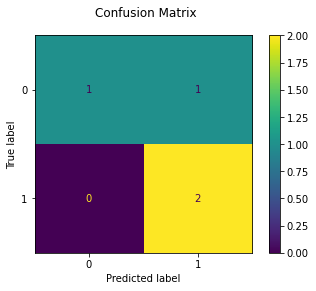

In [28]:
#plot confusion metrics

disp = metrics.plot_confusion_matrix(dtc_obj, x_test, y_test)
disp.figure_.suptitle('Confusion Matrix')
print(f'Confusion Matrix  :  \n{disp.confusion_matrix}')

plt.show()

    Step 7: Display Decsion Tree Created
     
     - This step requires graphviz and tkinter packages installed 

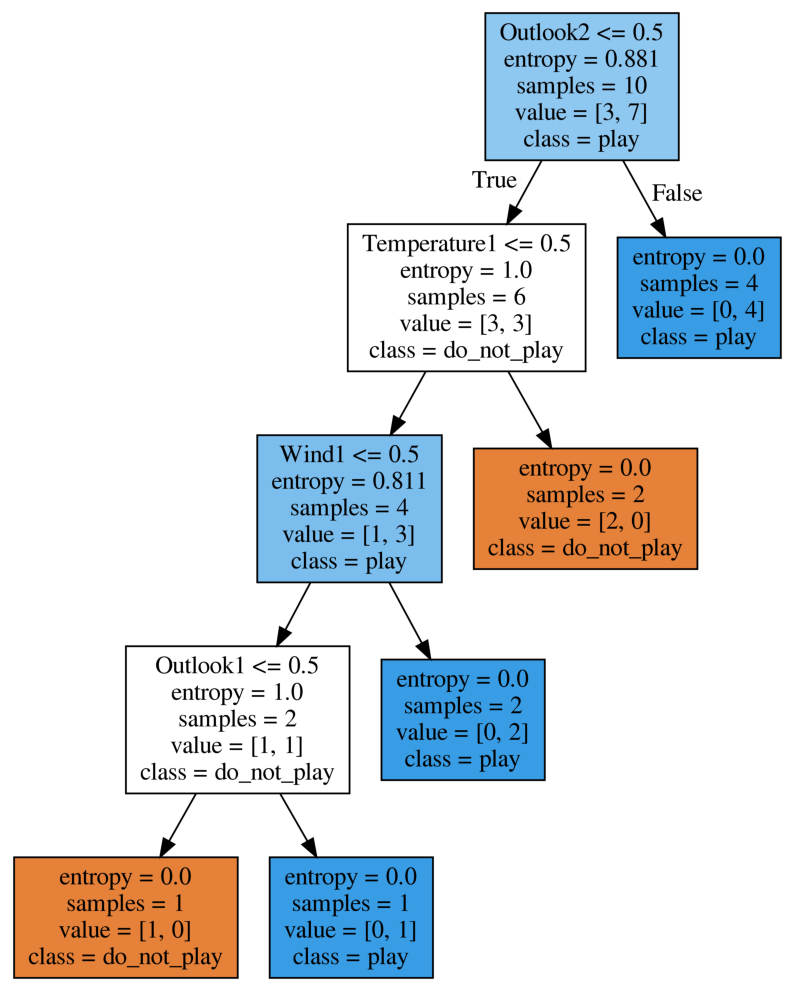

In [29]:

from subprocess import call
export_graphviz(dtc_obj, out_file='tree_entropy.dot', 
                feature_names = ['Outlook2', 'Outlook1', 'Outlook0', 'Temperature2', 'Temperature1', 'Temperature0', 'Humidity1', 'Humidity0', 'Wind1', 'Wind0'], 
                class_names = ['do_not_play', 'play'], 
                filled = True)

#convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();